In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import Camera

In [2]:
# Generate some random 3D points
num_points = 10
points = np.random.rand(num_points, 3) * 10

In [3]:
# Create a camera
camera = Camera(position=(0, 0, 0), rotation=(0, 0, 0))

In [4]:
def visualize_projection():
    # Project the points onto the camera's image plane
    projected_points = []
    sizes = []
    for point in points:
        projected_point, size = camera.transform(point, perspective=False)
        if size > 0:
            projected_points.append(projected_point)
            sizes.append(size)

    # Convert the projected points to a numpy array
    projected_points = np.array(projected_points)

    # Plot the points
    fig, ax = plt.subplots()
    ax.scatter(projected_points[:, 0], projected_points[:, 1])
    for proj, size in zip(projected_points, sizes):
        ax.annotate(str(round(size, 3)), proj)
    plt.show()

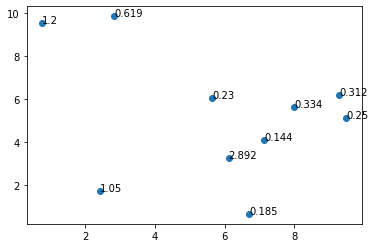

In [5]:
visualize_projection()

In [6]:
camera.rotation = (np.pi / 2,0,0)
camera.position = (0,0,0)

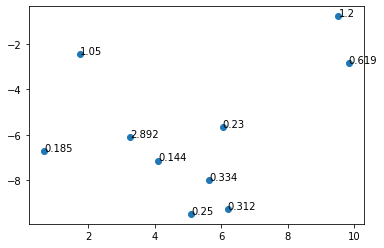

In [7]:
visualize_projection()

In [8]:
center_point = (3,0,0)

In [9]:
from utils.coord_transform import cartesian_to_spherical, spherical_to_cartesian
from numpy import exp, arcsin
from numpy import sin, pi # notice me

In [10]:
def object_rotation(coord0: tuple, center_point: tuple, alpha: float, beta: float, gamma: float):
    def rot_t(t):
        x0, y0, z0 = coord0
        xc, yc, zc = center_point
        relative_coord = (x0 - xc, y0 - yc, z0 - zc) # note: we are weird
        r0, theta0, phi0 = cartesian_to_spherical(*relative_coord)
        rt = r0 * exp(-alpha * t)
        thetat = beta * t + theta0
        phit = (phi0 ** 2 + (t * gamma) ** 2) ** 0.5 # np.pi / 2 * (1 - sin(gamma * t + phi0))
        phit %= 2 * pi
        if phit > pi:
            phit = 2 * pi - phit
        x, y, z = spherical_to_cartesian(rt, thetat, phit)
        return (x + xc, y + yc, z + zc)
    return rot_t

In [11]:
rot = object_rotation((3.4, 0, 3), center_point, 0.1, 0.5, 0.5)

0.0 3.0


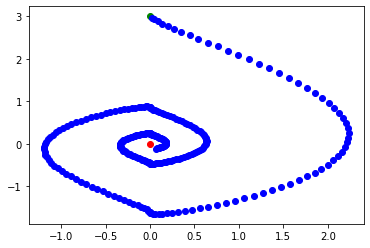

In [12]:
cam = Camera(position=(-10, 0, 0))
(xc, yc), sc = cam.transform(center_point, False)
plt.scatter([xc], [yc], c='r')
for t in np.arange(0, 30, 0.1):
    (xt, yt, zt) = rot(t)
    (x, y), size = cam.transform((xt, yt, zt), False)
    color = 'b'
    if t == 0: color = 'g'
    if t == 0: print(x, y)
    plt.scatter([x], [y], c=color)
    # plt.annotate(str(round(size, 3)), (x, y))
plt.show()

In [13]:
rot = object_rotation((3.6, 0, -3), center_point, 0.4, 2, 2)

0.0 -3.0


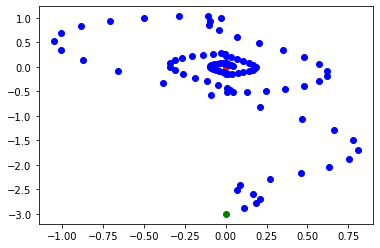

In [14]:
cam = Camera(position=(-10, 0, 0))
(xc, yc), sc = cam.transform(center_point, False)
plt.scatter([xc], [yc], c='r')
for t in np.arange(0, 10, 0.1):
    (xt, yt, zt) = rot(t)
    (x, y), size = cam.transform((xt, yt, zt), False)
    color = 'b'
    if t == 0: color = 'g'
    if t == 0: print(x, y)
    plt.scatter([x], [y], c=color)
    # plt.annotate(str(round(size, 3)), (x, y))
plt.show()